## 1. 텍스트 마이닝
- 텍스트분류
- 감성분석(감정분석): 긍/부정
- 텍스트생성: 챗GPT
- 텍스트요약: 논문
- 토픽모델링: 주요주제, 키워드

### A. 데이터 마이닝과 텍스트 마이닝
#### 1) 데이터 마이닝
    - ① 데이터에서 의미있는 정보를 추출하는 기술
    - ② 고급 통계 분석과 모델링 기법을 적용하여 데이터 안의 패턴과 관계를 찾아내는 과정
#### 2) 텍스트 마이닝
    - ① 비정형 텍스트 데이터에서 분석 도구를 이용하여 패턴을 탐구하여 새롭고 의미있는 정보를 찾아내는 과정 또는 기술
    - ② 비정형 텍스트 데이터를 정형화 및 특징을 추출하는 과정이 요구됨
    - ③ 자연어 처리 기술에 기반한 텍스트 데이터 가공 기술
    - ④ 모든 문서의 단어들을 하나하나의 변수로 보기 때문에 변수의 갯수가 매우 많아지게 됨.  즉, 일반적인 데이터마이닝에 비해 데이터의 차원이 훨씬 커지게 됨.


숫자, 특수문자, 문장부호 제거

조사, 어미 제외

형태소 분석 (단어 품사 분석)

불용어

### 실습예제

In [1]:
# 말뭉치(코퍼스, corpus) : 텍스트마이닝에 적용되는 텍스트 데이터 집합
# 사전 처리
# 대소문자 통일
# 영문 텍스트 데이터는 대문자 또는 소문자로 변환하는 것이 좋음(보통 소문자로 변경)

s="Hello World"
print(s.lower()) #소문자로 변환
print(s.upper()) #대문자로 변환

hello world
HELLO WORLD


In [2]:
### 숫자, 문장부호, 특수문자 제거
# 단어가 아니기 때문에 분석에 불필요한 경우가 대부분임
# 삭제할 경우 분석 결과가 왜곡된다고 생각될 경우 남겨둘 필요도 있음
# 날짜,수치,백분율 등의 숫자는 각각의 문장에서는 의미가 있지만,
# 전체 문서 집합에서는 크게 의미가 없는 경우가 많으므로 지우는 것이 일반적

# 숫자 제거
import re
p = re.compile("[0-9]+")   # [패턴]    +: 반복
result = p.sub("","올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다")    # sub대체, "", 패턴
print(result)

올해 들어 서울 지역의 부동산 가격이 % 하락했습니다


In [3]:
# . , ? ! 등의 문장부호들은 삭제하는 것이 일반적
# 각 문장에서는 특수한 역할을 수행할 수 있으나
# 전체 말뭉치의 관점에서는 의미를 부여하기 어려운 경우가 대부분임.
# - ( ) 등의 특수문자도 보통 삭제함

import re
def clean_text(input_data):
    # 텍스트에 포함되어 있는 숫자와 특수문자 제거
    p = re.compile("[0-9_!@#$%^&*]")
    result=p.sub("",input_data)
    return result
txt = "올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다!#$_$123"
print(txt)
print(clean_text(txt))

올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다!#$_$123
올해 들어 서울 지역의 부동산 가격이  하락했습니다


In [4]:
# 불용어 처리
# 불용어 : 빈번하게 사용되지만 구체적인 의미를 찾기 어려운 단어들
# 영어의 경우 the, a, an 등의 관사는 많이 사용되지만
# 텍스트마이닝에서는 특별한 의미를 부여하기 힘든 경우가 많음
# NLTK : 파이썬에서 많이 사용되는 텍스트마이닝 패키지

# 언어별로 불용어 리스트 제공, 한국어는 지원하지 않음
# 한국어 불용어 리스트를 제공하는 패키지는 아직 없으며
# 직접 만들거나 다른 분석가들이 작성한 리스트를 활용해야 함

words=["추석","연휴","민족","대이동","시작","늘어","교통량","교통사고","특히","자동차", "고장","상당수","나타","것","기자"]

#불용어
stopwords=["가다","늘어","나타","것","기자"]

#불용어 제거
[i for i in words if i not in stopwords]

# ↑ 위와 같은 내용
# result = []
# for word in words:
#     if word not in stopwords:
#         result.append(word)

['추석', '연휴', '민족', '대이동', '시작', '교통량', '교통사고', '특히', '자동차', '고장', '상당수']

In [5]:
# 영어 불용어 처리

import nltk
nltk.download("stopwords")   # 영문 불용어사전
from nltk.corpus import stopwords
words=["chief","justice","roberts",",","president","carter",",","president","clinton","president","bush","obama","fellow","americans","and","people","of","the","world","thank","you"]
[w for w in words if not w in stopwords.words("english")]    #영어 불용어사전 업데이트

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['chief',
 'justice',
 'roberts',
 ',',
 'president',
 'carter',
 ',',
 'president',
 'clinton',
 'president',
 'bush',
 'obama',
 'fellow',
 'americans',
 'people',
 'world',
 'thank']

In [6]:
import nltk
nltk.download("punkt") #문장 tokenizer 다운로드

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# 어근 동일화 처리 : 비슷한 어근 처리(stemming)

from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
stm = PorterStemmer()
txt="cook cooker cooking cooks cookery"
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w),end=" ")   # 어근추출

cook cooker cook cook cookeri 

In [8]:
# 어근이 동일한 키워드 정리: PorterStemmer
stm = PorterStemmer()
txt="pythoning pythons Python pythoners pythoned"
words=word_tokenize(txt)
for w in words:
    print(stm.stem(w),end=" ")

python python python python python 

In [9]:
# PorterStemmer와 비슷하지만 좀더 나은 성능: LancasterStemmer

from nltk.stem.lancaster import LancasterStemmer
stm = LancasterStemmer()
txt = "cook cooker cooking cooks cookery"
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w),end=" ")

cook cook cook cook cookery 

In [10]:
stm=LancasterStemmer()
txt="pythoning pythons Python pythoners pythoned"
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w),end=" ")

python python python python python 

In [11]:
# porter나 Lancaster가 처리하지 못하는 경우에는 RegexpStemmer를 사용하여 특정한 표현식을 일괄적으로 제거함

from nltk.stem.regexp import RegexpStemmer
stm = RegexpStemmer('ing')
print(stm.stem('cooking'))
print(stm.stem('cookery'))
print(stm.stem('ingleside'))

stm=RegexpStemmer("python")
txt="pythoning pythons Python pythoners pythoned"
words=word_tokenize(txt)
for w in words:
    print(stm.stem(w),end=" ")

cook
cookery
leside
ing s Python ers ed 

In [31]:
# N-gram : n번 연이어 등장하는 단어들의 연쇄
# 2회 바이그램, 3회 트라이그램, 보편적으로 영어에만 적용되며 바이그램이 주로 사용됨

txt = 'Hello'
# 2-gram이므로 문자열의 끝에서 한 글자 앞까지만 반복함
for i in range(len(txt) - 1):            
    # 현재 문자와 그다음 문자 출력
    print(txt[i], txt[i + 1], sep='')  

He
el
ll
lo


In [32]:
# 공백을 기준으로 문자열을 분리하여 리스트로 저장
txt = 'this is python script'
words = txt.split()                

for i in range(len(words) - 1):      # 2-gram이므로 리스트의 마지막에서 요소 한 개 앞까지만 반복함
    # 현재 문자열과 그다음 문자열 출력
    print(words[i], words[i + 1])    


this is
is python
python script


In [13]:
txt = 'hello'
two_gram = zip(txt, txt[1:])
for i in two_gram:
    print(i[0], i[1], sep='')

he
el
ll
lo


In [14]:
txt = 'this is python script'
words = txt.split()
list(zip(words, words[1:]))

[('this', 'is'), ('is', 'python'), ('python', 'script')]

In [15]:
from nltk import ngrams
sentence="I love you.  Good morning.  Good bye."
grams = ngrams(sentence.split(),2)
for gram in grams:
    print(gram, end=" ")

('I', 'love') ('love', 'you.') ('you.', 'Good') ('Good', 'morning.') ('morning.', 'Good') ('Good', 'bye.') 

In [36]:
sentence="I love you.  Good morning.  Good bye."
grams=ngrams(sentence.split(),3)
for gram in grams:
    print(gram,end=" ")

('I', 'love', 'you.') ('love', 'you.', 'Good') ('you.', 'Good', 'morning.') ('Good', 'morning.', 'Good') ('morning.', 'Good', 'bye.') 

In [37]:
### 한국어 처리

# 헌법 말뭉치
from konlpy.corpus import kolaw
#말뭉치에 포함된 파일 목록
kolaw.fileids()

# 헌법
c = kolaw.open('constitution.txt').read()
print(c[:40])

# 국회의안 말뭉치
from konlpy.corpus import kobill
kobill.fileids()

d = kobill.open('1809890.txt').read()
print(d[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로
지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


In [22]:
# 품사 분석
# POS 태깅(Part-Of-Speech)
# 모든 언어에 명사,동사,형용사,부사는 공통적으로 존재함


# 한나눔 패키지 - KAIST Semantic Web Research Center 개발
# http://semanticweb.kaist.ac.kr/hannanum/
# pip install konlpy
# pip install jpype1==1.0.2
#jdk8 버전 설치(java 최신버전은 잘 호환되지 않을 수 있음)

from konlpy.tag import Hannanum
han=Hannanum()
txt="""원/달러 환율이 3년 5개월 만에 최고치로 마감하고,
위안화 환율이 11년 만에 달러당 7위안을 넘었다.
원/엔 재정환율 역시 100엔당 30원 가까이 뛰었다."""

#형태소 분석
print(han.morphs(txt))

# 형태소와 품사
print(han.nouns(txt)) #명사 추출
print(han.pos(txt))
print(han.tagset) #품사 목록

['원', '/', '달러', '환율', '이', '3년', '5개월', '만', '에', '최고치', '로', '마감', '하고', ',', '위안화', '환율', '이', '11년', '만', '에', '달러당', '7위', '안', '을', '넘', '었다', '.', '원', '/', '엔', '재정환율', '역시', '100엔', '당', '30원', '가까이', '뛰', '었다', '.']
['원', '달러', '환율', '3년', '5개월', '만', '최고치', '마감', '위안화', '환율', '11년', '만', '달러당', '7위', '원', '엔', '재정환율', '100엔', '30원']
[('원', 'N'), ('/', 'S'), ('달러', 'N'), ('환율', 'N'), ('이', 'J'), ('3년', 'N'), ('5개월', 'N'), ('만', 'N'), ('에', 'J'), ('최고치', 'N'), ('로', 'J'), ('마감', 'N'), ('하고', 'J'), (',', 'S'), ('위안화', 'N'), ('환율', 'N'), ('이', 'J'), ('11년', 'N'), ('만', 'N'), ('에', 'J'), ('달러당', 'N'), ('7위', 'N'), ('안', 'X'), ('을', 'J'), ('넘', 'P'), ('었다', 'E'), ('.', 'S'), ('원', 'N'), ('/', 'S'), ('엔', 'N'), ('재정환율', 'N'), ('역시', 'M'), ('100엔', 'N'), ('당', 'X'), ('30원', 'N'), ('가까이', 'M'), ('뛰', 'P'), ('었다', 'E'), ('.', 'S')]
{'E': '어미', 'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ET': '전성 어미', 'F': '외국어', 'I': '독립언', 'II': '감탄사', 'J': '관계언', 'JC': '격조사', 'JP': '서술격 조사', 'JX':

In [24]:
# 꼬꼬마 패키지 - 서울대학교 IDS(Intelligent Data Systems) 연구실 개발
#   http://kkma.snu.ac.kr/

from konlpy.tag import Kkma
kkm=Kkma()
print(kkm.morphs(txt)) #형태소 분석
print(kkm.nouns(txt))
print(kkm.pos(txt))
print(kkm.tagset) #품사 목록

['원', '/', '달러', '환율', '이', '3', '년', '5', '개월', '만', '에', '최고', '치', '로', '마감', '하', '고', ',', '위', '안화', '환율', '이', '11', '년', '만', '에', '달', '러', '당', '7', '위', '안', '을', '넘', '었', '다', '.', '원', '/', '엔', '재정', '환율', '역시', '100', '엔', '당', '30', '원', '가까이', '뛰', '었', '다', '.']
['원', '달러', '환율', '3', '3년', '년', '5', '5개월', '개월', '만', '최고', '마감', '위', '위안화', '안화', '11', '11년', '당', '7', '7위안', '안', '엔', '재정', '재정환율', '100', '100엔당', '엔', '30', '30원']
[('원', 'NNM'), ('/', 'SP'), ('달러', 'NNG'), ('환율', 'NNG'), ('이', 'JKS'), ('3', 'NR'), ('년', 'NNM'), ('5', 'NR'), ('개월', 'NNM'), ('만', 'NNB'), ('에', 'JKM'), ('최고', 'NNG'), ('치', 'XSN'), ('로', 'JKM'), ('마감', 'NNG'), ('하', 'XSV'), ('고', 'ECE'), (',', 'SP'), ('위', 'NNG'), ('안화', 'NNG'), ('환율', 'NNG'), ('이', 'JKS'), ('11', 'NR'), ('년', 'NNM'), ('만', 'NNB'), ('에', 'JKM'), ('달', 'VV'), ('러', 'ECD'), ('당', 'NNG'), ('7', 'NR'), ('위', 'NNG'), ('안', 'NNG'), ('을', 'JKO'), ('넘', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF'), ('원', 'NNM'), ('/', 'SP')

In [25]:
# 트위터 패키지 - 트위터에서 개발, 2017년 이후 오픈코리안텍스트로 이름이 바뀜
#  https://github.com/twitter

from konlpy.tag import Okt
okt=Okt()
print(okt.morphs(txt)) #형태소 분석
print(okt.nouns(txt))
print(okt.pos(txt))
print(okt.tagset)
# 어구 추출
print(okt.phrases(txt))

['원', '/', '달러', '환율', '이', '3년', '5', '개월', '만에', '최고', '치', '로', '마감', '하고', ',', '\n', '위안화', '환율', '이', '11년', '만에', '달러', '당', '7위안', '을', '넘었다', '.', '\n', '원', '/', '엔', '재정', '환율', '역시', '100엔', '당', '30원', '가까이', '뛰었다', '.']
['원', '달러', '환율', '개월', '최고', '치', '마감', '위안화', '환율', '달러', '원', '재정', '환율', '역시', '가까이']
[('원', 'Noun'), ('/', 'Punctuation'), ('달러', 'Noun'), ('환율', 'Noun'), ('이', 'Josa'), ('3년', 'Number'), ('5', 'Number'), ('개월', 'Noun'), ('만에', 'Josa'), ('최고', 'Noun'), ('치', 'Noun'), ('로', 'Josa'), ('마감', 'Noun'), ('하고', 'Josa'), (',', 'Punctuation'), ('\n', 'Foreign'), ('위안화', 'Noun'), ('환율', 'Noun'), ('이', 'Josa'), ('11년', 'Number'), ('만에', 'Josa'), ('달러', 'Noun'), ('당', 'Suffix'), ('7위안', 'Number'), ('을', 'Foreign'), ('넘었다', 'Verb'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('원', 'Noun'), ('/', 'Punctuation'), ('엔', 'Josa'), ('재정', 'Noun'), ('환율', 'Noun'), ('역시', 'Noun'), ('100엔', 'Number'), ('당', 'Foreign'), ('30원', 'Number'), ('가까이', 'Noun'), ('뛰었다', 'Verb'), ('.

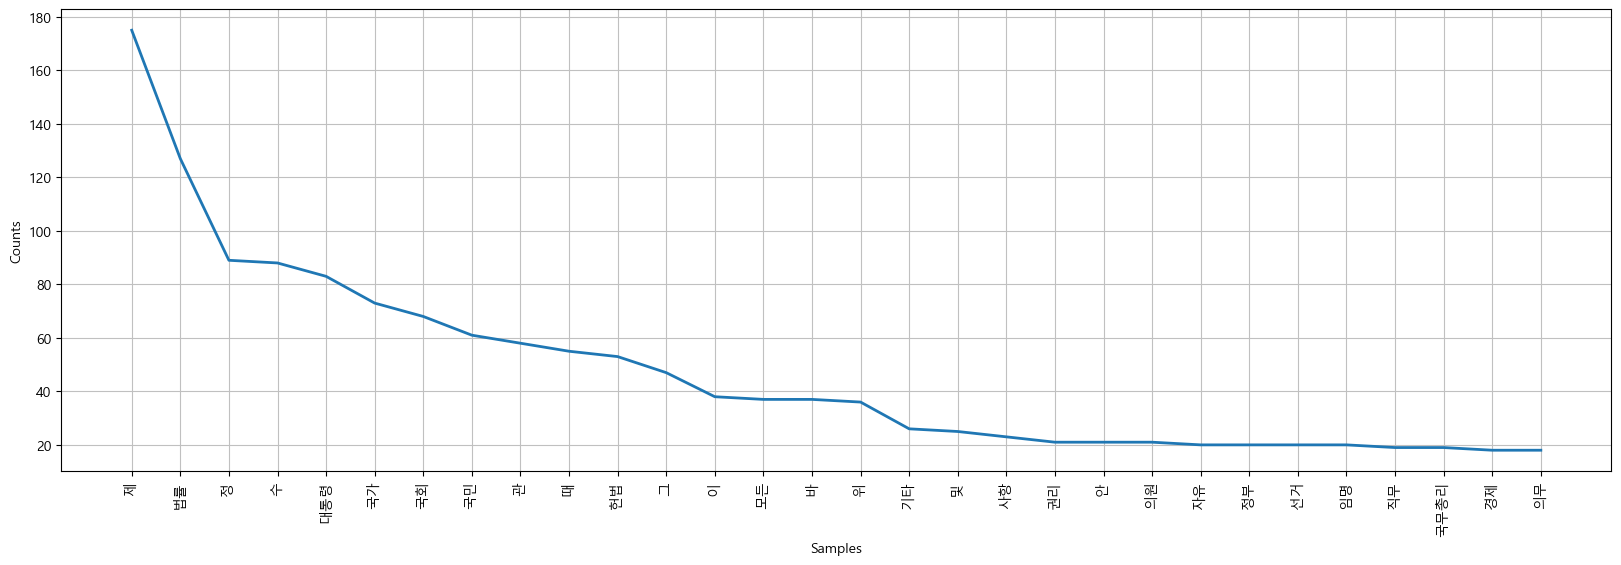

In [26]:
# 단어 출현 빈도
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from nltk import Text
plt.figure(figsize=(20,6))
kolaw = Text(okt.nouns(c), name="kolaw")
kolaw.plot(30)
plt.show()

# 에러가 발생할 경우 
# visual studio 재배포 패키지 설치 후 (vc_redist_x64.exe)
# https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud
# python 버전에 맞는 whl 파일 다운로드
# 로컬디렉토리에 있는 파일로 설치
# pip install wordcloud-버전-cp39-cp39-win_amd64.whl

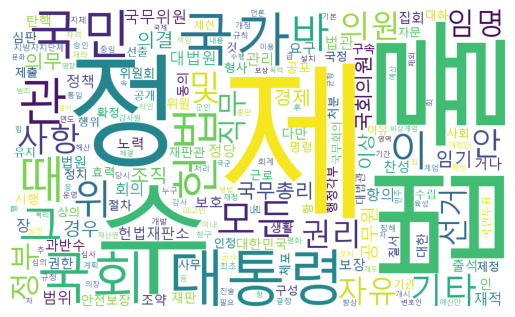

In [27]:
from wordcloud import WordCloud
font_path = 'c:/windows/fonts/malgun.ttf'
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))   #단어의 출현빈도
plt.axis("off")
plt.show()

In [28]:
# 영어 품사 분석
import nltk
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [29]:
from nltk import pos_tag
a="I love you."
tags=pos_tag(a.split())
print(tags)

[('I', 'PRP'), ('love', 'VBP'), ('you.', 'RB')]


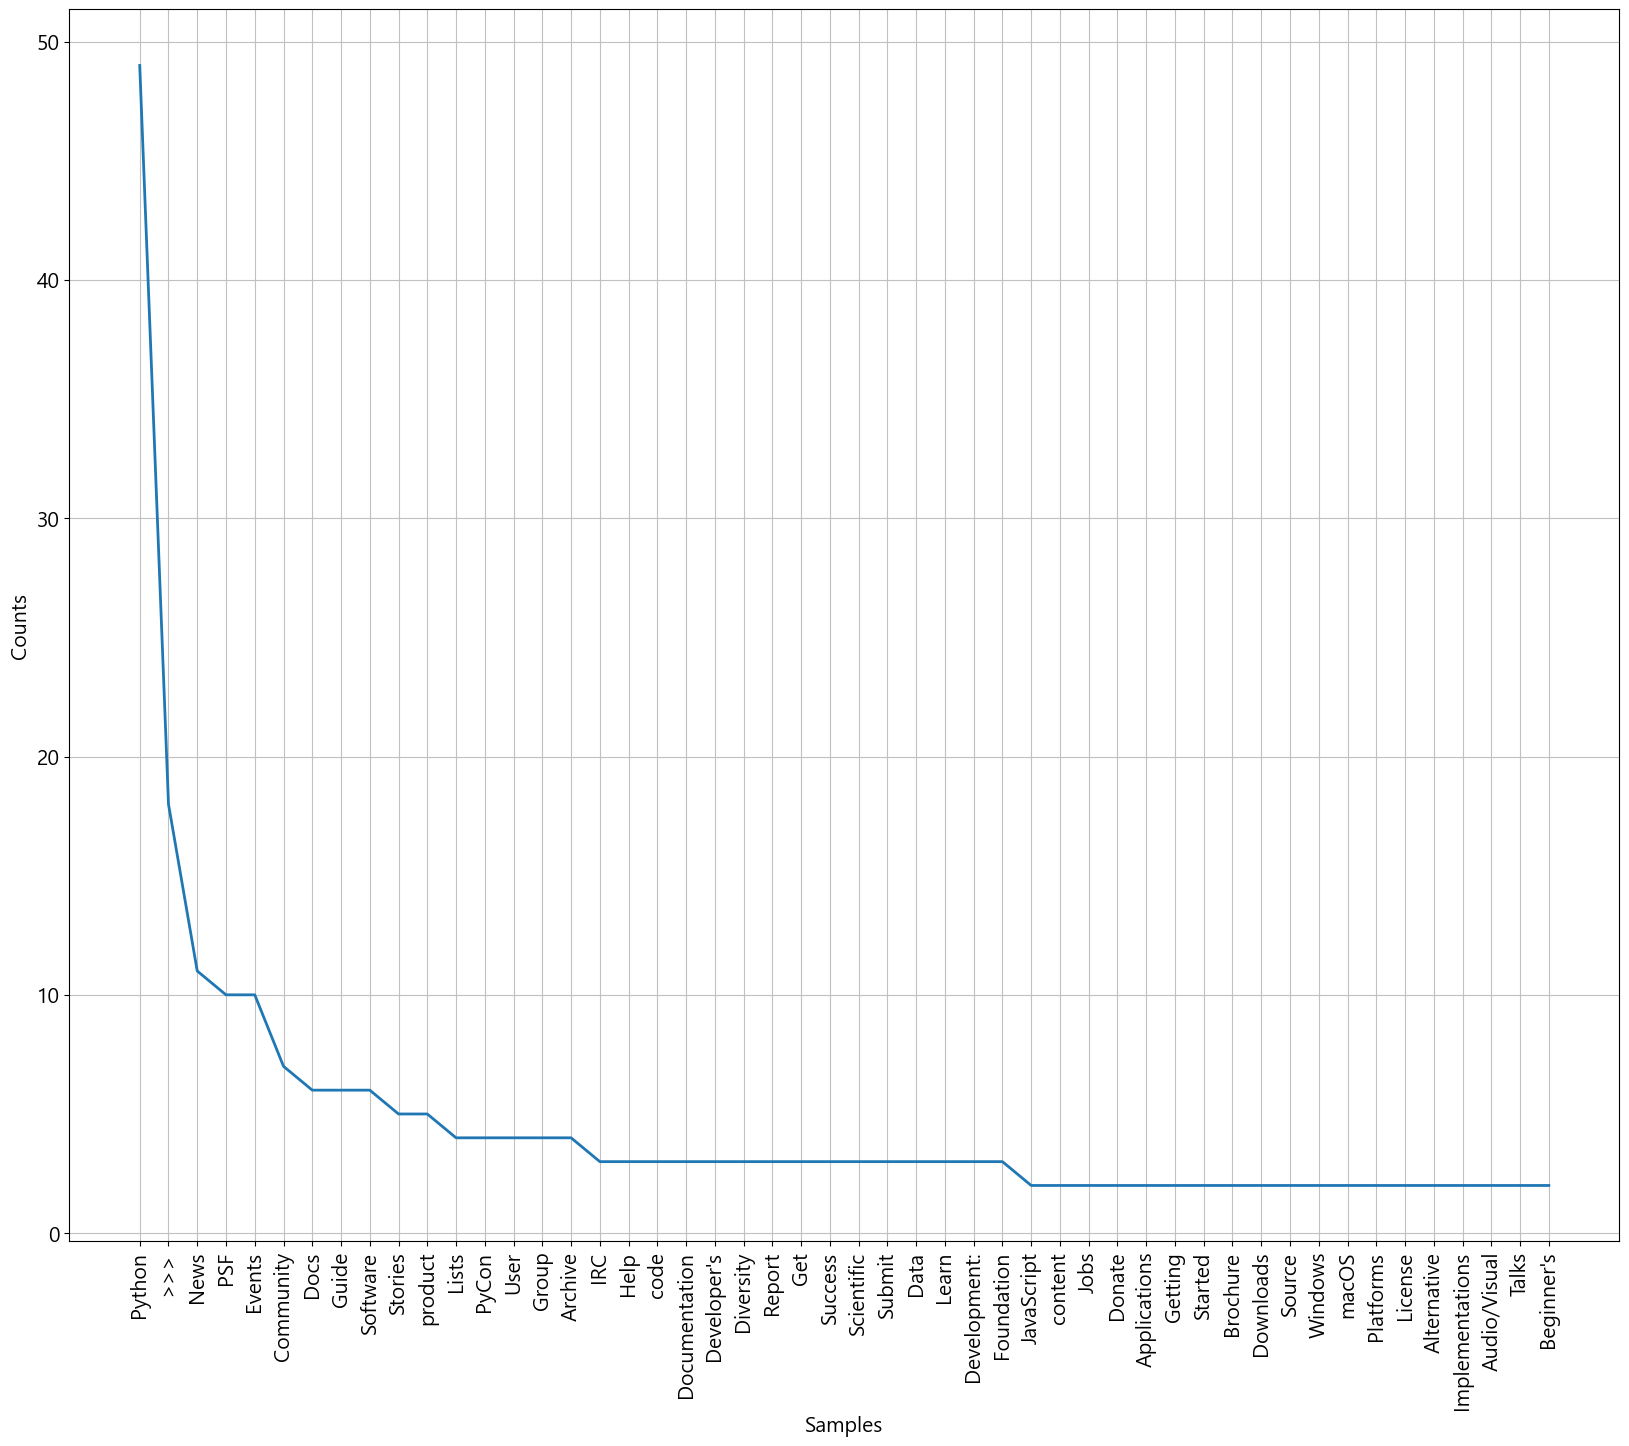

<Axes: xlabel='Samples', ylabel='Counts'>

In [30]:
import urllib
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(20,16)
plt.rcParams["font.size"]=15
res = urllib.request.urlopen('http://python.org/')
html = res.read()   # html코드소스 전체 읽어오기

# 알파벳,숫자,_ 문자들만 선택
tokens = re.split('\W+',html.decode('utf-8'))
clean = BeautifulSoup(html,'html.parser').get_text()
tokens = [token for token in clean.split()]
stop = set(stopwords.words('english'))
clean_tokens = [token for token in tokens
               if len(token.lower())>1 and (token.lower() not in stop)]
                # 소문자로 바꾸고 2글자 이상, 불용어가 아닌 단어만 가져오기
tagged = nltk.pos_tag(clean_tokens)   # 품사태깅

# 보통명사, 고유명사만 추출
allnoun=[word for word,pos in tagged if pos in ['NN','NNP']]
freq_result = nltk.FreqDist(allnoun)    # 단어의 출현빈도
freq_result.plot(50, cumulative=False)  # 상위 50개
